In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**코드를 꼭 직접 적어봐야함**   
**모르는 것 모두 적고 이해한 뒤 넘어가야함**   
**자세하게 찾아보고 서로 알려주기 급하게x 꾸준하게o**   


# 타이타닉 튜토리얼

* 만약 데이터 사이언스, 머신러닝 또는 캐글에서 어떤 것을 해야하는 지 잘 모르는 ^뉴비^ 라면, 타이타닉을 하시는 게 가장 좋은 선택입니다.
* 타이타닉은 아시다시피, 사상 최대 해난사고로써, 1,500여명의 희생자가 생겼습니다.
* 우리는 이 튜토리얼에서 타이타닉에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 모델을 생성할 것입니다.
* 본 튜토리얼에서는 여러 시각화 도구 (matplotlib, seaborn, plotly) 데이터 분석 도구(pandas, numpy), 머신 러닝 도구(sklearn)을 사용할 것입니다.
* 본 튜토리얼은 캐글에 있는 여러 커널들을 참조하여 만들었습니다. 본 튜토리얼을 공부하신 뒤에, 캐글 타이타닉 컴퍼티션에 존재하는 여러 다른 커널들을 더 공부하시면 되빈다.
* 본 튜토리얼은 파이썬 문법에 어려움이 없으셔야 수월할 것입니다. 여기서 사용하는 라이브러리들을 써본 경험이 있으면 좋겠지만, 경험이 없다하더라도 한 줄씩 천천히 적어나가시면 충분히 하실 수 있습니다.

In [2]:
import numpy as np 
# 수치해석 라이브러리 파이썬에서 수학 연산을 위한 가장 기본적인 패키지로,
# 선형대수 계산 기능을 제공
# 벡터처럼 사용할 수 있다.
# 데이터 분석 시 데이터를 벡터로 표현하기 때문에 대부분의 데이터 분석 라이브러리들이 벡터를 사용. 
import pandas as pd 
# 데이터 조작/ 분석 위해 쓰는 라이브러리
# **테이블** 형태의 데이터를 다루는 데이터 프레임 자료형 제공
import matplotlib.pyplot as plt 
# 얘도 시각화 라이브러리인데, 각종 그래프나 차트 등을 그리는 시각화 기능 제공
import seaborn as sns 
# 얘도 시각화 라이브러리, 
# Matplotlib 패키지에서 지원하지 않는 고급 통계 차트를 그리는 통계용 시각화기능 제공
# pandas의 dataframe과 호환이 잘 됨.


# ~라이브러리 import 하는중~
# 보통 데이터분석을 할때 pandas, numpy, matplotlib, seaborn 을 미리 import 하고 시작하는 경우가 많다.

plt.style.use('seaborn') # matplotlib의 폰트 스타일을 seaborn 스타일시트로 변경
sns.set(font_scale=2.5) # seaborn의 font_scale을 2.5로 지정
# 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme을 세팅하고,
# 일일이 graph의 font size를 지정할 필요 없이 seaborn의 font_scale을 사용하면 편합니다.

import missingno as msno # missingno는 결측데이터들을 파악하는데 직관적인 도움을 주는 패키지

#ignore warnings
import warnings
warnings.filterwarnings('ignore') # 경고 메시지를 숨김

%matplotlib inline 
# notebook을 실행한 브라우저에서 바로 도표, 소리, 애니메이션, 그림을 볼 수 있게 해주는 것

앞으로 우리가 해야할 프로세스는 대략 아래와 같습니다.
1. 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정리되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고 , 향후 수정합니다.
2. 탐색적 데이터 분석(exploratory data analysis) - 여러 feature들을 개별적으로 분석하고, feature들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.
3. feature engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature들을 engineering 합니다. one hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.
4. model 만들기 - sklearn 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수도 있습니다.
5. 모델 학습 및 예측 - trainset을 가지고 모델을 학습시킨 후 , testset을 가지고 prediction 합니다.
6. 모델 평가 - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.


# 1. Dataset 확인

* 파이썬에서 테이블 화 된 데이터를 다루는 데 가장 최적화되어 있으며, 많이 쓰이는 라이브러리는 pandas입니다. 
* 우리는 pandas를 사용하여 데이터셋의 간단한 통계적 분석 부터, 복잡한 처리들을 간단한 메소드를 사용하여 해낼 수 있습니다.
* 파이썬으로 데이터분석을 한다고 하면 반드시 능숙해져야 할 라이브러리이니, 여러 커널들을 공부하시면서 사용법에 익숙해지도록 반복 또 반복하시길 권장합니다.
* 캐글에서 데이터셋은 보통 train, testset으로 나뉘어 있습니다.

In [3]:
df_train = pd.read_csv('../input/titanic/train.csv') # 해당 파일 경로의 csv 파일을 불러와서 df_train으로 선언.
df_test = pd.read_csv('../input/titanic/test.csv')   # 해당 파일 경로의 csv 파일을 불러와서 df_test로 선언.

In [4]:
df_train.head() # df_train 내의 첫 5줄을 출력해봅니다?
# head(self, n=5) dataframe 내의 처음 n 줄의 데이터를 출력한다. 기본값은 5 임.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 우리가 다루는 문제에서 feature는 Pclass, Age, Sibsp, Fare이며, 예측하려는 target label은 Survived입니다.

|변수(feature,variable)|정의|설명|타입|
|------|---|---|---|
|survival|생존여부|target label 임. 1, 0으로 표현됨|integer|
|Pclass|티켓의 클래스|1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature|integer|
|sex|성별|male, female로 구분되며 binary|string|
|Age|나이|continuous|integer|
|sibSp|함께 탑승한 형제와 배우자의 수|quantitative|integer|
|parch|함께 탑승한 부모, 아이의 수|quantitative|integer|
|ticket|티켓 번호|quantitative + integer|string|
|fare|탑승료|continuous|float|
|cabin|객실 번호|alphabat + integer|string|
|embared|탑승 항구|C = Cherbourg, Q = Queenstown, S = Southampton|string|

* pandas dataframe에는 describe() 메소드가 있는데, 이를 쓰면 각 feature가 가진 통계치들을 반환해 줍니다.
이렇게

In [5]:
df_train.describe()
# describe(percentiles = None, include = None)
# 다양한 통계량을 요약해줌. 누락데이터 제외
# percentiles : 백분위수를 출력하기 위한 데이터를 입력받음 (기본값 [0.25, 0.5, 0.75])
# 기본값에 따라 25%, 50%, 75% 가 출력된 것을 확인가능
# include : 결과를 요약하기 위한 데이터 타입의 리스트를 입력받음.
# all - 입력의 모든 열이 출력에 포함됨 (문자열까지 출력해줌) / None - 모든 숫자 열을 출력

# 결과를 보면 숫자열만 출력된 것을 확인 가능!

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 테이블에서 보다시피, Passenger ID 숫자와 다른, 그러니까 null data가 존재하는 열(feature) 이 있는 것 같습니다. (min 같은)
* 이를 좀 더 보기 편하도록 그래프로 시각화해서 살펴봅시당

## 1.1 Null data check

In [6]:
for col in df_train.columns: # df_train 데이터프레임의 전체 열 이름을 조회함(.columns)
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    # (':>' 전체 열 이름인 col값을 오른쪽 정렬하고 문자열 자릿수 10자리로) (탭) (소수점 둘째자리까지 출력)
    # 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]) 
    # col 마다 null인 값의 합 / col의 행 개수 * 100 = NaN의 백분율을 구한것이야
    print(msg)
    

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [7]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)
    
    

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


* Train, Test set에서 Age(둘 다 약 20%), Cabin(둘 다 약 80%), Embarked(Train만 0.22%) null data 존재하는 것을 볼 수 있습니다.
* MANO 라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있습니다.


<AxesSubplot:>

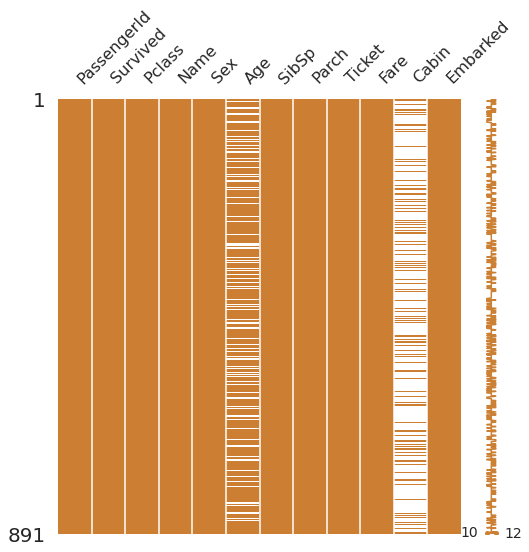

In [8]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color = (0.8, 0.5, 0.2))
# msmo : 결측치 시각화에 사용하는 missingno 라이브러리. 앞서 msno라는 이름으로 import 했었따.
# 여러가지 형태로 시각화 하는데, 여기서는 matrix 형태로 시각화 함.
# missingno는 matplotlib의 옵션을 같게 사용하므로, 유사
# RGB color (0.8,0.5,0.2) 여기다 * 255를 해주면 RGB 색상이 나옴.
# figsize(가로, 세로)
# df_train.iloc[행 인덱스, 열 인덱스] ::이므로 모든 행, 열의 값들을 출력해라는 거임
# df = df_train은 잘모르겟당 ㅎ

## 1.2 Target label 확인
* target label이 어떤 distribution을 가지고 있는 지 확인해봐야 합니다.
* 지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있습니다.

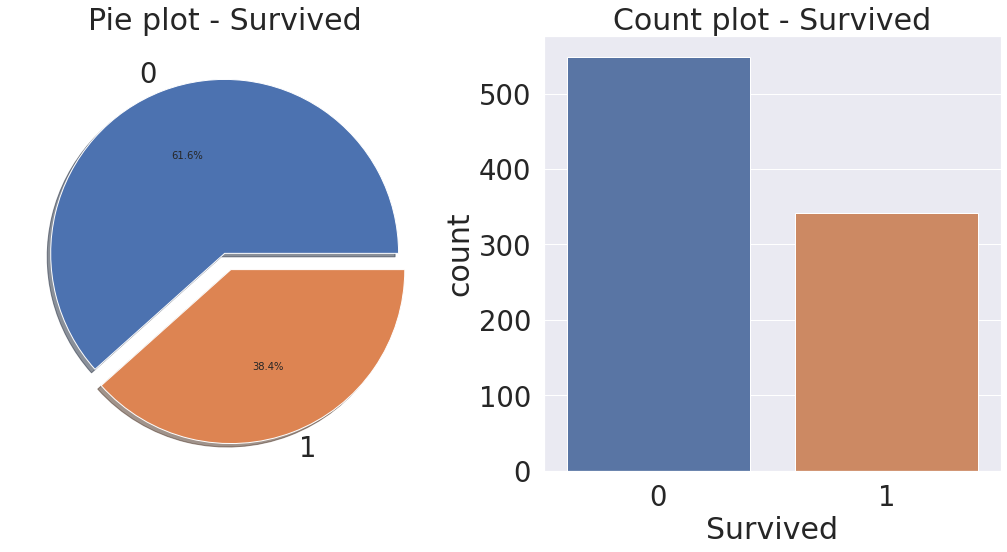

In [9]:
# 대소문자 주의
f, ax = plt.subplots(1,2, figsize=(18, 8)) 
# matplotlib를 plt로 불러왔었음 
# subplots 한번에 여러개의 그래프를 그리는 메소드. 한번에 설정 가능. subplot도 기능이 같다. 일일이 지정해줘야해 
# subplots는 두개의 값을 받을 수 있는데 figure, axes 순서다. 변수명은 상관없다.
# 여기서는 f가 figure고 ax가 axes겠다.
# f = 전체 subplot을 말한다. 그래프들을 담는 하나의 전체 사이즈
# ax = 전체 중 낱개를 말함. 
# 둘 다 가로 18, 세로8 사이즈로 그려라는 뜻이고, 1,2는 1행 2열 배치로 그릴거라는 뜻임...

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)

ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax = ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

* 안타깝게도 죽은 사람이 많습니다.
* 38.4%가 살아남았습니다.
* target label의 분포가 제법 균일(balanced)합니다. 불균일한 경우, 예를 들어서 100중 1이 99, 0이 1개인 경우에는 만약 모델이 모든것을 1이라 해도 정확도가 99%가 나오게 됩니다. 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 됩니다. 지금 문제에서는 그렇지 않으니 계속 진행하겠습니다.


# 2. Exploratory data analysis
* 이제 본격적으로 데이터 분석을 해보겠습니다. 데이터는 매우 많습니다. 이 많은 데이터 안에 숨겨진 사실을 찾기 위해선 **적절한 시각화**가 필요합니다.
* 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있습니다. 특정 목적에 맞는 소스코드를 정리해두어 필요할 때마다 참고하면 편합니다.

# 2.1 Pclass
* 먼저 Pclass에 대해서 살펴보겠습니다.Pclass는 ordinal, 서수형 데이터입니다. 카테고리이면서, 순서가 있는 데이터 타입입니다.
* 먼저 Pclass에 따른 생존률의 차이를 살펴보겠습니다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe에서는 groupby를 사용하면 쉽게 할 수 있습니다. 또한 pivot이라는 메소드도 있습니다.
* 'Pclass', 'Survived'를 가져온 후, pclass로 묶습니다. 그러고 나면 각 pclass마다 0, 1 이 count가 되는데, 이를 평균내면 각 pclass별 생존률이 나옵니다.
* 아래와 같이 count()를 하면, 각 class에 몇명이 있는 지 확인할 수 있으며, sum()을 하면, 216명 중 생존한(survived=1)사람의 총합을 주게 됩니다.